先端データ解析レポート 第７回  
37-196357 蓑田 浩史

In [17]:
import numpy as np
import matplotlib.pylab as plt

In [177]:
def generate_data(sample_size=90, n_class=3):
    x = (np.random.normal(size=(sample_size // n_class, n_class))
         + np.linspace(-3., 3., n_class)).flatten()
    y = np.broadcast_to(np.arange(n_class),
                        (sample_size // n_class, n_class)).flatten()
    return x, y

In [178]:
x, y = generate_data()

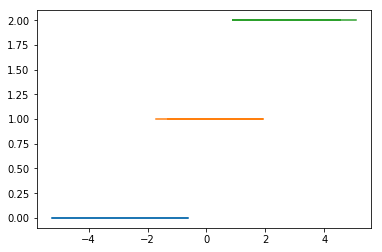

In [179]:
plt.plot(x[y==0],np.ones(len(x[y==0]))*0)
plt.plot(x[y==1],np.ones(len(x[y==1]))*1)
plt.plot(x[y==2],np.ones(len(x[y==0]))*2)

In [180]:
def update(theta, x, y, eps, func):
    i = np.random.randint(len(x))
    x_i = x[i]
    y_i = y[i]
    Phi = np.array([func(x_j,x_i) for x_j in x]).reshape(1,-1)
    predict = np.exp([theta[i]@Phi[0] for i in range(len(theta))]).reshape(1,-1)
    
    plus = Phi.T@np.array([[y_i==i for i in range(len(theta))]])
    
    delta = - Phi.T@predict/np.sum(predict) + plus
    
    return theta + eps*delta.T

In [192]:
eps = 0.01
threshold = 0.0001
theta = np.random.randn(3, len(x))
h = 1
func_gauss = lambda x,y : np.exp(-np.sum((x-y)**2)/2/h**2)

converge = False
count = 0

while not converge:
    count += 1
    theta_prev = theta
    theta = update(theta_prev, x, y, eps, func_gauss)
    if np.linalg.norm(theta-theta_prev)<threshold:
        converge = True

In [193]:
def predict(x_test, x, theta, func):
    Phi = np.array([func(x_j,x_test) for x_j in x]).reshape(1,-1)
    Ys = Phi@theta.T
    return np.argmax(Ys[0])

In [209]:
X_test = [0.1*i-5 for i in range(100)]
y_test = []
for x_test in X_test:
    y_test.append(predict(x_test, x, theta, func_gauss)+0.02)

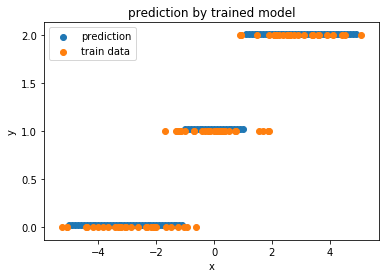

In [210]:
plt.title('prediction by trained model')
plt.scatter(X_test, y_test, label='prediction')
plt.scatter(x, y, label='train data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()